Feature Description
The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

To ease your start with the data you can read the feature descriptions below:

View "PhotoObj"
objid = Object Identifier
ra = J2000 Right Ascension (r-band)
dec = J2000 Declination (r-band)
Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

Source: https://en.wikipedia.org/wiki/Right_ascension

u = better of DeV/Exp magnitude fit
g = better of DeV/Exp magnitude fit
r = better of DeV/Exp magnitude fit
i = better of DeV/Exp magnitude fit
z = better of DeV/Exp magnitude fit
The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

Further education: https://www.astro.umd.edu/~ssm/ASTR620/mags.html

run = Run Number
rereun = Rerun Number
camcol = Camera column
field = Field number
Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

run number, which identifies the specific scan,
the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
An additional number, rerun, specifies how the image was processed.
View "SpecObj"
specobjid = Object Identifier
class = object class (galaxy, star or quasar object)
The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

redshift = Final Redshift
plate = plate number
mjd = MJD of observation
fiberid = fiber ID
In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.

In [1]:
#import libary for use method
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Skyserver.csv')
df.head(20)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


In [3]:
df.tail(25)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9975,1.237650e+18,130.315380,51.013385,17.52183,16.35850,15.84101,15.53401,15.26725,1345,301,3,156,5.011760e+17,GALAXY,0.038559,445,51873,548
9976,1.237650e+18,130.608094,51.012221,19.47647,17.46056,16.40154,15.98281,15.59540,1345,301,3,157,5.011750e+17,GALAXY,0.121568,445,51873,545
9977,1.237650e+18,130.643134,51.060704,19.27703,18.70139,18.51972,18.28529,18.32489,1345,301,3,157,5.011740e+17,GALAXY,0.111352,445,51873,541
9978,1.237650e+18,130.570838,51.127933,19.39394,17.47129,16.54575,16.12287,15.75583,1345,301,3,157,5.011750e+17,GALAXY,0.073597,445,51873,543
9979,1.237650e+18,130.818299,51.204332,19.52465,19.14411,18.98649,18.98454,18.78073,1345,301,3,158,5.033590e+17,QSO,0.903496,447,51877,296
9980,1.237650e+18,130.770044,51.247639,19.33009,17.37091,16.36515,15.91382,15.53280,1345,301,3,158,5.011830e+17,GALAXY,0.098118,445,51873,573
9981,1.237650e+18,130.692527,51.332803,19.50854,18.11260,17.44901,17.12710,16.84752,1345,301,3,158,5.011820e+17,GALAXY,0.097270,445,51873,568
9982,1.237650e+18,130.745374,51.349638,17.71841,16.63823,16.31214,16.21565,16.16031,1345,301,3,159,5.011840e+17,STAR,-0.000227,445,51873,575
9983,1.237650e+18,130.912335,51.334877,17.93836,16.82273,16.50460,16.40109,16.35758,1345,301,3,159,8.211270e+18,STAR,0.000022,7293,56741,288
9984,1.237650e+18,131.000507,51.311551,19.03042,17.44158,16.60432,16.16952,15.87176,1345,301,3,159,5.011950e+17,GALAXY,0.095191,445,51873,616


In [4]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [5]:
#Lets Understand the Columns Values
info = ["Object Identifier",
        "J2000 Right Ascension (r-band)",
        "J2000 Declination (r-band)",
        "better of DeV/Exp magnitude fit",
        "better of DeV/Exp magnitude fit",
        "better of DeV/Exp magnitude fit",
        "better of DeV/Exp magnitude fit",
       "better of DeV/Exp magnitude fit",
        "Run Number",
        "Rerun Number",
        "Camera column",
        "Field number",
       "\bObject Identifier",
        "object class (galaxy, star or quasar object)",
        "\bFinal Redshift",
        "plate number",
       "MJD of observation",
        "\bfiber ID"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

objid:			Object Identifier
ra:			J2000 Right Ascension (r-band)
dec:			J2000 Declination (r-band)
u:			better of DeV/Exp magnitude fit
g:			better of DeV/Exp magnitude fit
r:			better of DeV/Exp magnitude fit
i:			better of DeV/Exp magnitude fit
z:			better of DeV/Exp magnitude fit
run:			Run Number
rerun:			Rerun Number
camcol:			Camera column
field:			Field number
specobjid:			Object Identifier
class:			object class (galaxy, star or quasar object)
redshift:			Final Redshift
plate:			plate number
mjd:			MJD of observation
fiberid:			fiber ID


In [6]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [7]:
print(df.isnull().sum())

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64


In [8]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [9]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


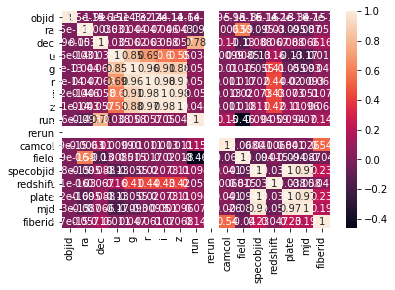

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
df.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid'], axis=1, inplace=True)

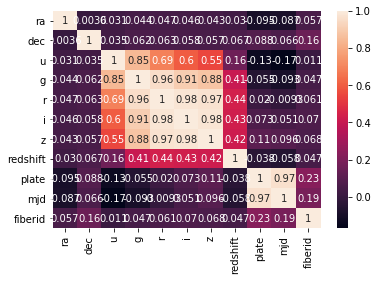

In [12]:
sns.heatmap(df.corr(),annot=True)

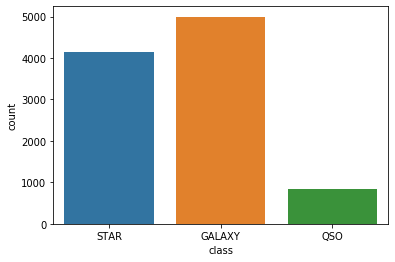

In [13]:
sns.countplot(x='class',data=df)

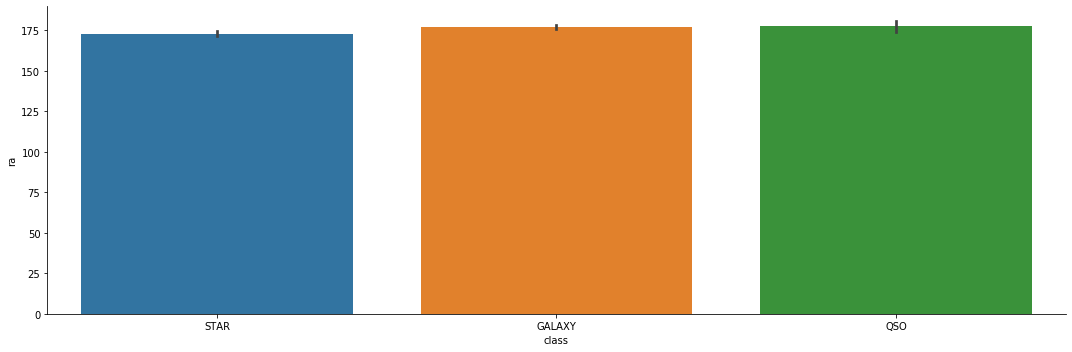

In [14]:
sns.factorplot(x = 'class', y='ra', kind = 'bar', data=df,aspect = 3)

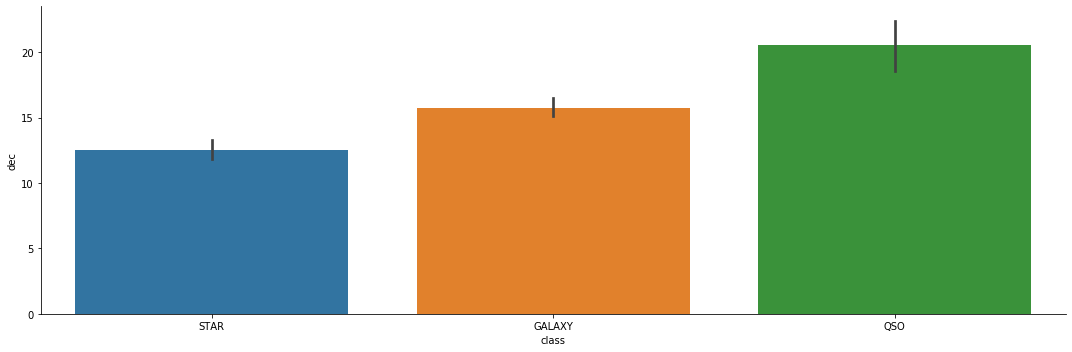

In [15]:
sns.factorplot(x = 'class', y='dec', kind = 'bar', data=df,aspect = 3)

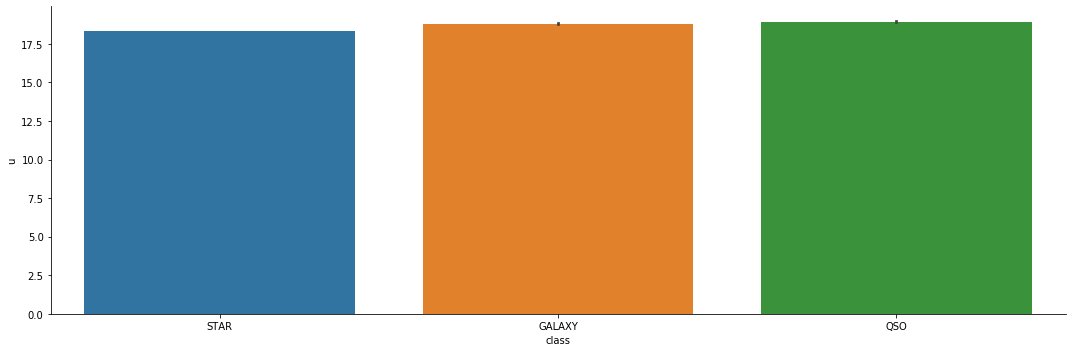

In [16]:
sns.factorplot(x = 'class', y='u', kind = 'bar', data=df,aspect = 3)

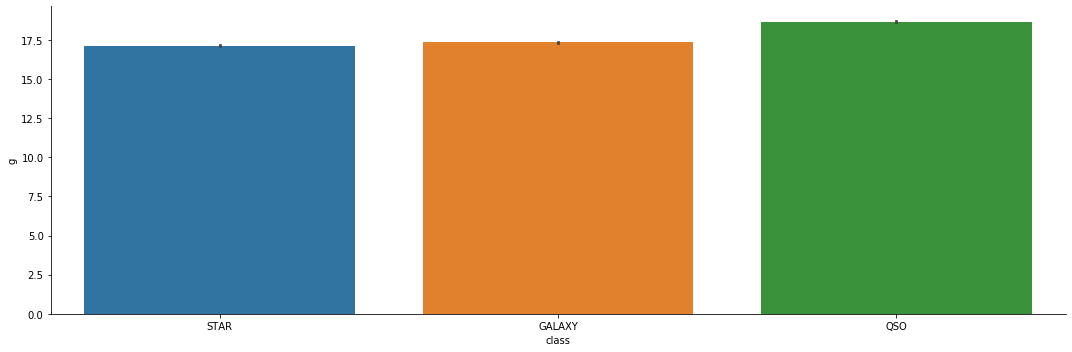

In [17]:
sns.factorplot(x = 'class', y='g', kind = 'bar', data=df,aspect = 3)

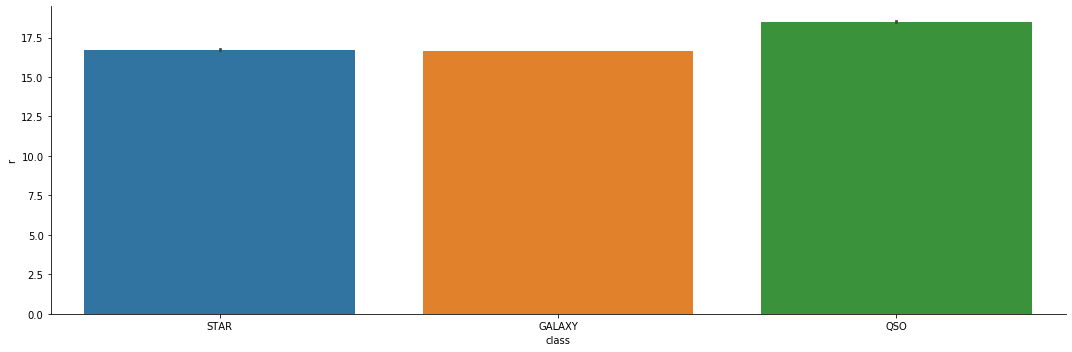

In [18]:
sns.factorplot(x = 'class', y='r', kind = 'bar', data=df,aspect = 3)

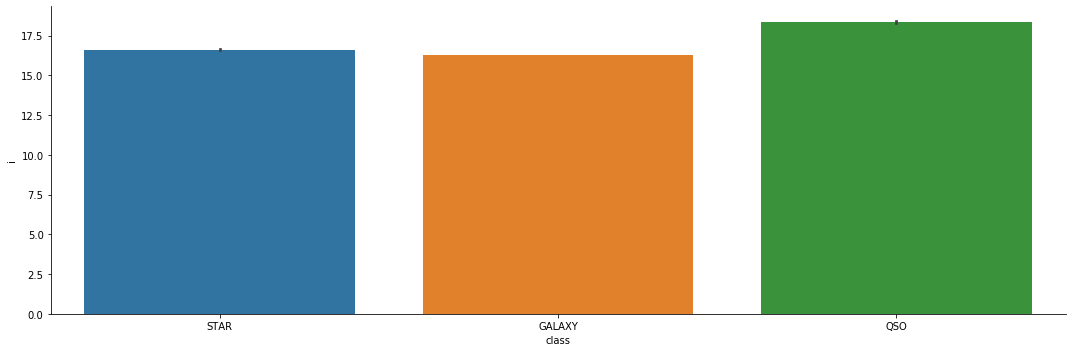

In [19]:
sns.factorplot(x = 'class', y='i', kind = 'bar', data=df,aspect = 3)

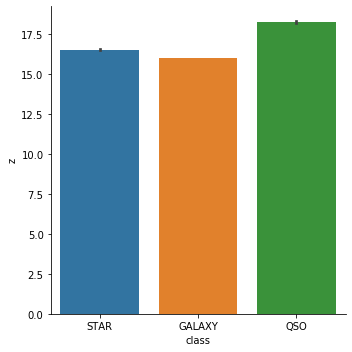

In [20]:
sns.factorplot(x = 'class', y='z', kind = 'bar', data=df)

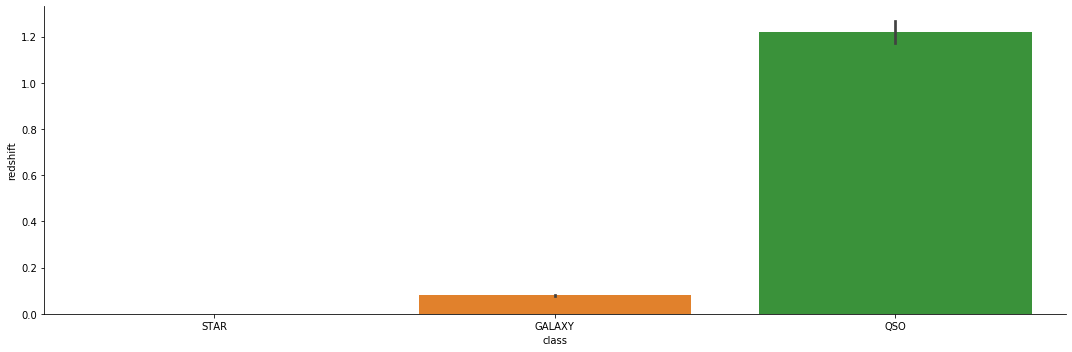

In [21]:
sns.factorplot(x = 'class', y='redshift', kind = 'bar', data=df,aspect = 3)

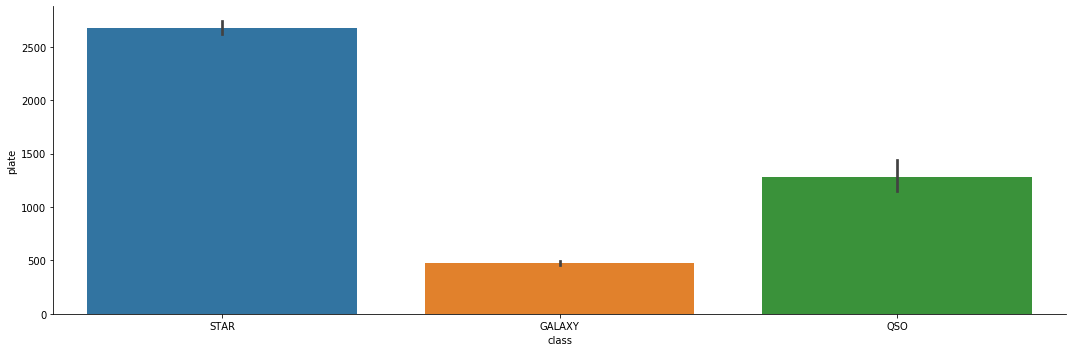

In [22]:
sns.factorplot(x = 'class', y='plate', kind = 'bar', data=df,aspect = 3)

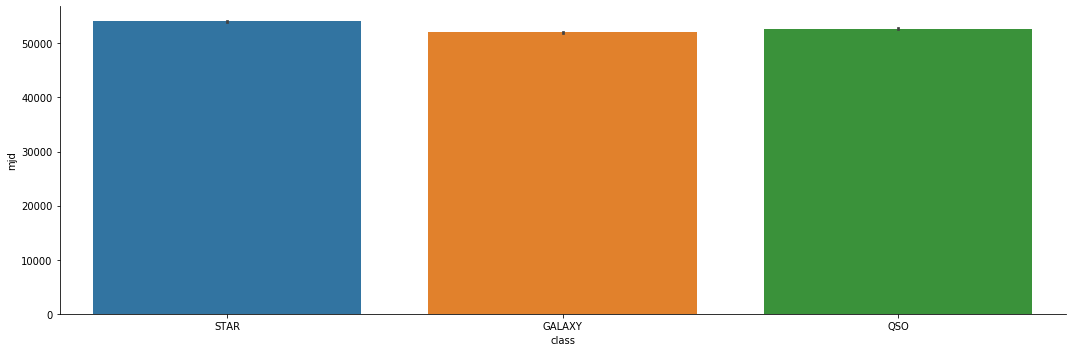

In [23]:
sns.factorplot(x = 'class', y='mjd', kind = 'bar', data=df,aspect = 3)

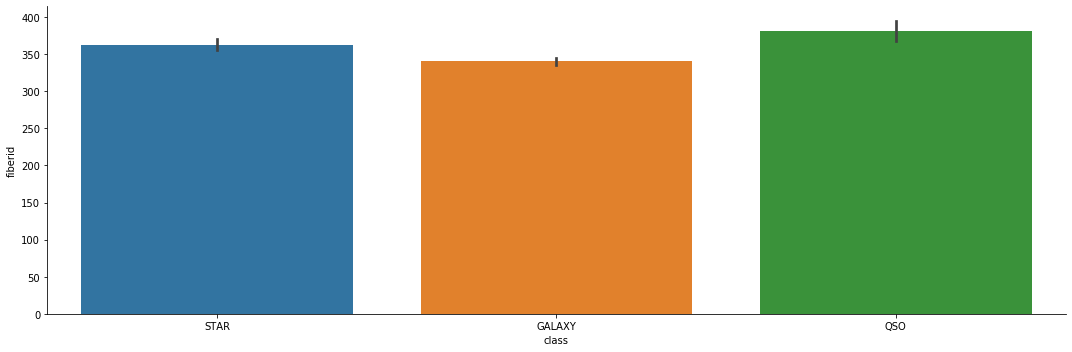

In [24]:
sns.factorplot(x = 'class', y='fiberid', kind = 'bar', data=df,aspect = 3)

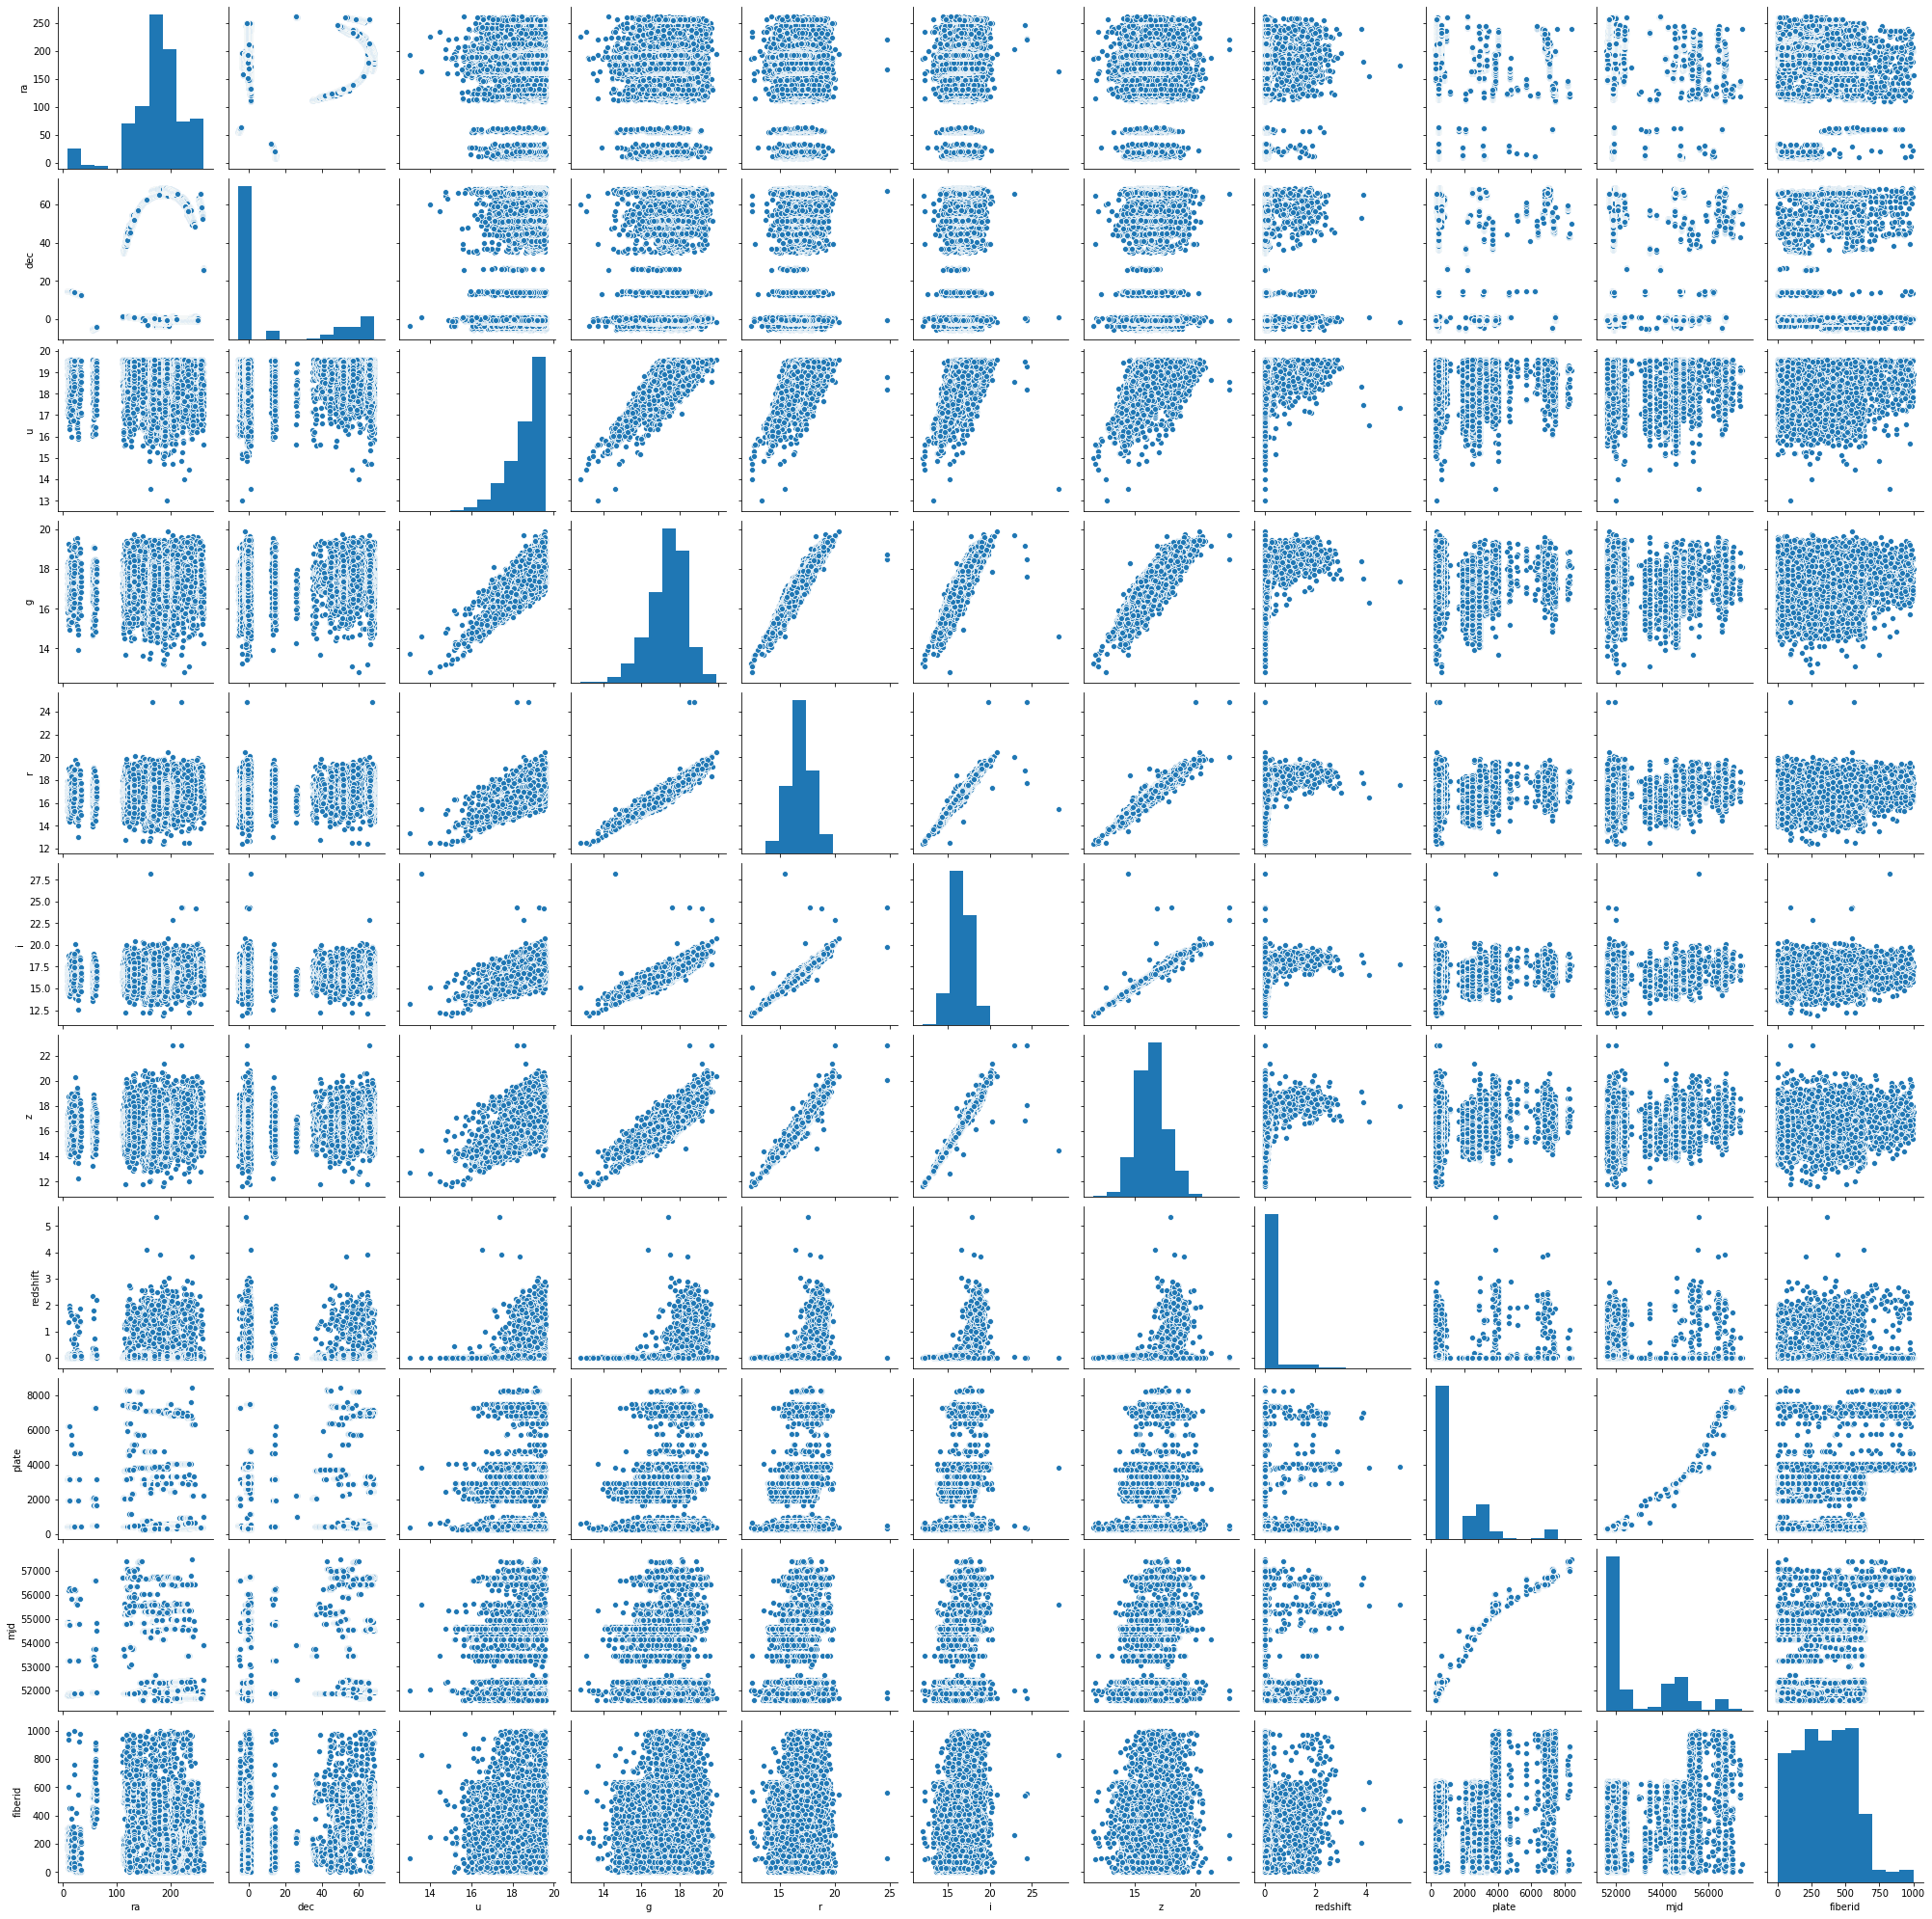

In [25]:
sns.pairplot(df)

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class']) #label encoding


In [27]:
#lets check whether their are outliers present in the dataset or not
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(10000, 12)
(8698, 12)


In [28]:
y = pd.DataFrame(df['class'],columns=['class'])


In [29]:
X = df.drop('class',axis=1,inplace=True)

In [30]:
X = df

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [32]:
X = pd.DataFrame(X_std,columns=X.columns)

In [33]:
#Prediction - Classification Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [34]:
#Split the data into train and test set for classifcation predictions

from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=9,stratify=y)
x_train.shape, y_train.shape, x_test.shape

((7000, 11), (7000, 1), (3000, 11))

In [35]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100,random_state=0)

In [36]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))

In [37]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [38]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('###############################',name,'##################################\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre),'\n')
    cm=confusion_matrix(y_test,pre)
    print('Confusion Matrix\n',cm,'\n')
    print('\n\n')

############################### KNeighborsClassifier ##################################

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score=  0.9063333333333333


Cross_val_score= 0.9073


classification_report
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1499
           1       0.98      0.87      0.92       255
           2       0.93      0.86      0.89      1246

    accuracy                           0.91      3000
   macro avg       0.93      0.89      0.91      3000
weighted avg       0.91      0.91      0.91      3000
 

Confusion Matrix
 [[1429    3   67]
 [  24  222    9]
 [ 177    1 1068]] 




############################### SVC ##################################

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape

In [39]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,90.633333,90.73
1,SVC,96.433333,96.67
2,LogisticRegression,97.666667,97.65
3,GaussianNB,97.100000,97.01
4,RandomForestClassifier,98.800000,98.88


In [40]:
from sklearn.externals import joblib
joblib.dump(RFC,'Model_Class.obj')

['Model_Class.obj']

In [41]:
model=joblib.load('Model_Class.obj')

In [42]:
result=pd.DataFrame(model.predict(x_test))

In [43]:
result.to_csv('classprdictresults.csv')